## Black Friday sales prediction

#### Now import some libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import *
import matplotlib
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MeanShift , estimate_bandwidth

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance

from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, precision_score
from sklearn.metrics import recall_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import cluster, mixture
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split, GridSearchCV

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

##### The dataset is split into two files , for the training set we use file name 'train.csv' and after the training of model we use file name 'test.csv' for the test 

In [5]:
df=pd.read_csv('train.csv')

In [6]:
df.head(15)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                          4+               0                   8   
5                           3               0                   1   
6                           2               1                   1   
7                           2               1                   1   
8                           2               1                   1   
9                           1               1                   8   
10                          1               1                   5   
11                          1               1                   8   
12                          1               1                   8   
13                          1               1                   1   
14                          1               0                   5   

    Product_Category_2  Product_Category_3  Purchase  
0                  NaN                 NaN      8370  
1                  6.0                14.0     15200  
2                  NaN                 NaN      1422  
3                 14.0                 NaN      1057  
4                  NaN                 NaN      7969  
5                  2.0                 NaN     15227  
6                  8.0                17.0     19215  
7                 15.0                 NaN     15854  
8                 16.0                 NaN     15686  
9                  NaN                 NaN      7871  
10                11.0                 NaN      5254  
11                 NaN                 NaN      3957  
12                 NaN                 NaN      6073  
13                 2.0                 5.0     15665  
14                 8.0                14.0      5378

In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.describe()

User_ID     Occupation  Marital_Status  Product_Category_1  \
count  5.500680e+05  550068.000000   550068.000000       550068.000000   
mean   1.003029e+06       8.076707        0.409653            5.404270   
std    1.727592e+03       6.522660        0.491770            3.936211   
min    1.000001e+06       0.000000        0.000000            1.000000   
25%    1.001516e+06       2.000000        0.000000            1.000000   
50%    1.003077e+06       7.000000        0.000000            5.000000   
75%    1.004478e+06      14.000000        1.000000            8.000000   
max    1.006040e+06      20.000000        1.000000           20.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       376430.000000       166821.000000  550068.000000  
mean             9.842329           12.668243    9263.968713  
std              5.086590            4.125338    5023.065394  
min              2.000000            3.000000      12.000000  
25%              5.000000            9.000000    5823.000000  
50%              9.000000           14.000000    8047.000000  
75%             15.000000           16.000000   12054.000000  
max             18.000000           18.000000   23961.000000

In [10]:
# find the unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## EDA

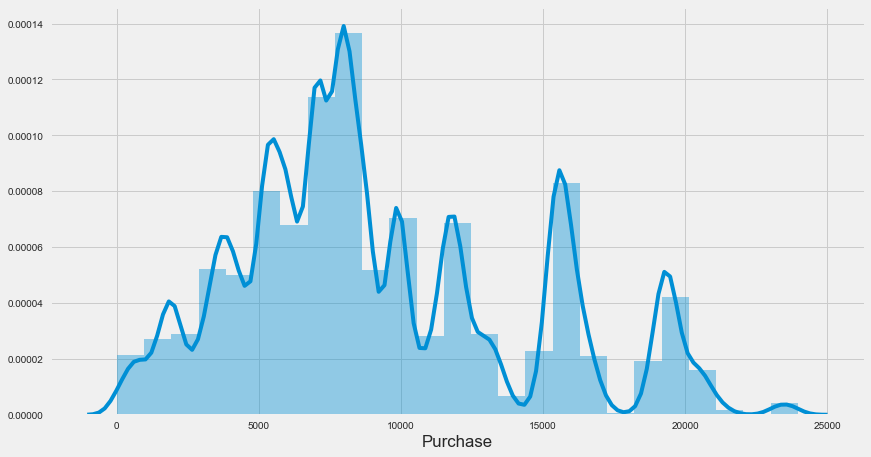

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.distplot(df['Purchase'], bins=25)

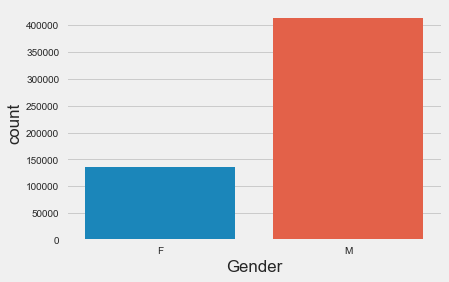

In [12]:
sns.countplot(df['Gender'])

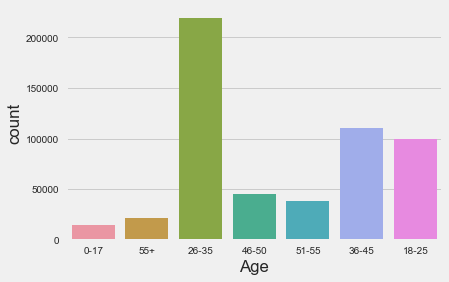

In [13]:
sns.countplot(df['Age'])

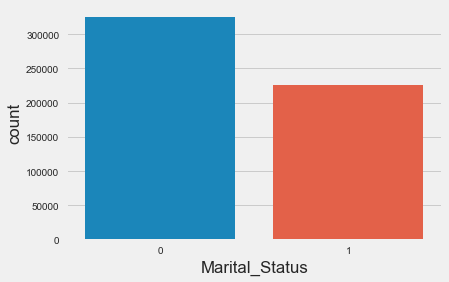

In [14]:
sns.countplot(df['Marital_Status'])

In [15]:
sns.countplot(df['Occupation'])

In [16]:
sns.countplot(df['Product_Category_1'])

In [17]:
sns.countplot(df['Product_Category_2'])

In [18]:
sns.countplot(df['Product_Category_3'])

In [19]:
sns.countplot(df['City_Category'])

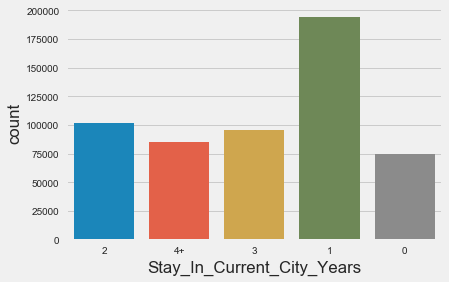

In [20]:
sns.countplot(df['Stay_In_Current_City_Years'])

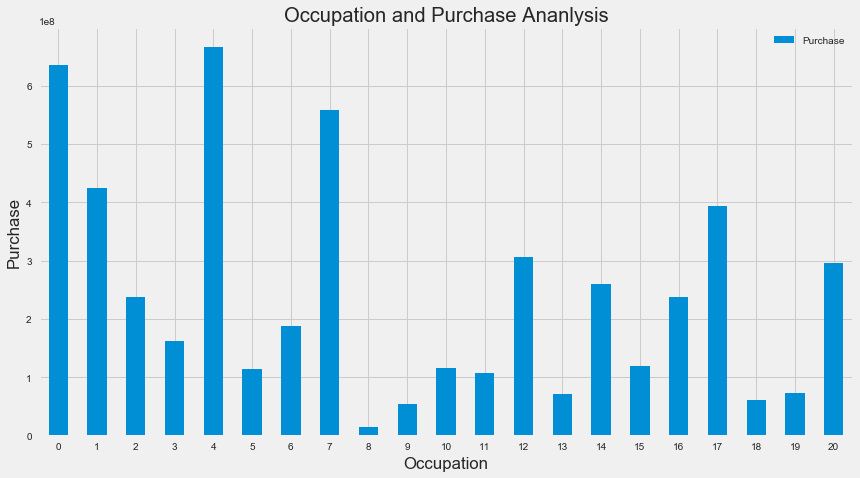

In [21]:
# bivariate analysis

occupation_plot=df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.sum)
occupation_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and Purchase Ananlysis')
plt.xticks(rotation=0)
plt.show()

In [22]:
# bivariate analysis

occupation_plot=df.pivot_table(index='Occupation', values='Purchase', aggfunc=np.mean)
occupation_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Occupation')
plt.ylabel('Purchase')
plt.title('Occupation and Purchase Ananlysis')
plt.xticks(rotation=0)
plt.show()

In [23]:
# bivariate analysis

age_plot=df.pivot_table(index='Age', values='Purchase', aggfunc=np.mean)
age_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Age')
plt.ylabel('Purchase')
plt.title('Age and Purchase Ananlysis')
plt.xticks(rotation=0)
plt.show()

In [24]:
# bivariate analysis

gender_plot=df.pivot_table(index='Gender', values='Purchase', aggfunc=np.mean)
gender_plot.plot(kind='bar', figsize=(13,7))
plt.xlabel('Gender')
plt.ylabel('Purchase')
plt.title('Gender and Purchase Ananlysis')
plt.xticks(rotation=0)
plt.show()

## Preprocessing 

In [25]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

 Now we have to change the type of the 'Product_Category_2' and 'Product_Category_3' as 'float32'

In [26]:
df['Product_Category_2']=df['Product_Category_2'].fillna(-2.0).astype("float32")

In [27]:
df['Product_Category_3']=df['Product_Category_3'].fillna(-2.0).astype("float32")

In [28]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

By the dict we encode the values 

In [29]:

gender_dict={'F':0, 'M':1}
df['Gender']=df['Gender'].apply(lambda x: gender_dict[x])

In [30]:
df.head()

User_ID Product_ID  Gender   Age  Occupation City_Category  \
0  1000001  P00069042       0  0-17          10             A   
1  1000001  P00248942       0  0-17          10             A   
2  1000001  P00087842       0  0-17          10             A   
3  1000001  P00085442       0  0-17          10             A   
4  1000002  P00285442       1   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                -2.0                -2.0      8370  
1                 6.0                14.0     15200  
2                -2.0                -2.0      1422  
3                14.0                -2.0      1057  
4                -2.0                -2.0      7969

### label Encoding columns

to improve the metric we use onehot encoding

In [31]:

cols=['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols:
    df[col]=le.fit_transform(df[col])
df.head()

User_ID Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001  P00069042       0    0          10              0   
1  1000001  P00248942       0    0          10              0   
2  1000001  P00087842       0    0          10              0   
3  1000001  P00085442       0    0          10              0   
4  1000002  P00285442       1    6          16              2   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                           4               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                -2.0                -2.0      8370  
1                 6.0                14.0     15200  
2                -2.0                -2.0      1422  
3                14.0                -2.0      1057  
4                -2.0                -2.0      7969

## Corelation Matrix

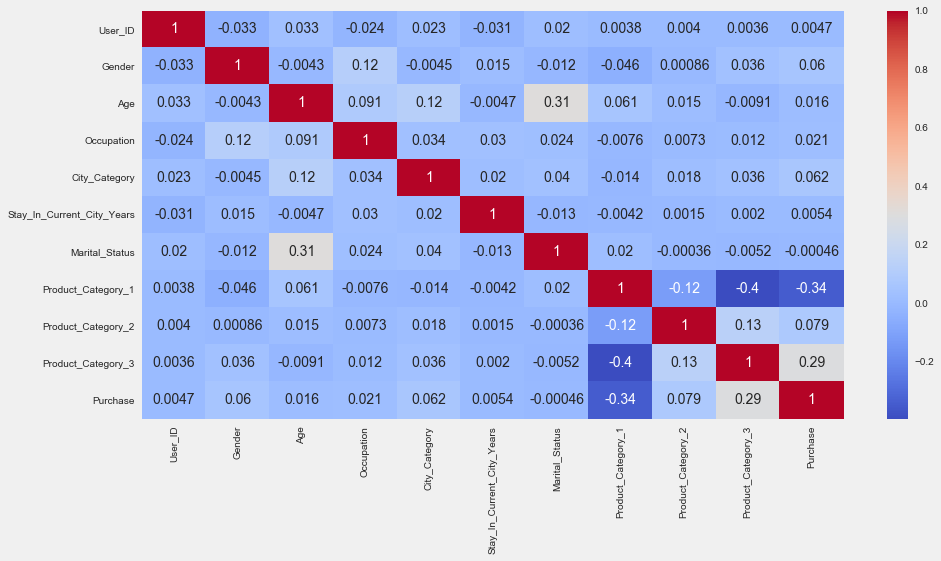

In [32]:
corr=df.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr,annot=True,cmap='coolwarm')

## Train test split

In [33]:
df.head()

User_ID Product_ID  Gender  Age  Occupation  City_Category  \
0  1000001  P00069042       0    0          10              0   
1  1000001  P00248942       0    0          10              0   
2  1000001  P00087842       0    0          10              0   
3  1000001  P00085442       0    0          10              0   
4  1000002  P00285442       1    6          16              2   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                           4               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                -2.0                -2.0      8370  
1                 6.0                14.0     15200  
2                -2.0                -2.0      1422  
3                14.0                -2.0      1057  
4                -2.0                -2.0      7969

In [34]:
X=df.drop(columns=['User_ID','Product_ID','Purchase'])
y=df['Purchase']

## Models

In [35]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

def train(model,X,y):
    x_train,x_test,y_train,y_test= train_test_split(X,y,random_state=42, test_size=0.25)
    model.fit(x_train,y_train)
    
    
    #predict resultd
    pred=model.predict(x_test)
    
    # cross validation
    cv_score=cross_val_score(model,X,y, scoring='neg_mean_squared_error',cv=5)
    cv_score=np.abs(np.mean(cv_score))
    
    
    print('Results')
    print('RMSE', np.sqrt(mean_squared_error(y_test,pred)))
    print("CV Score",np.sqrt(cv_score))


Results
RMSE 4617.994034201719
CV Score 4625.252945835688


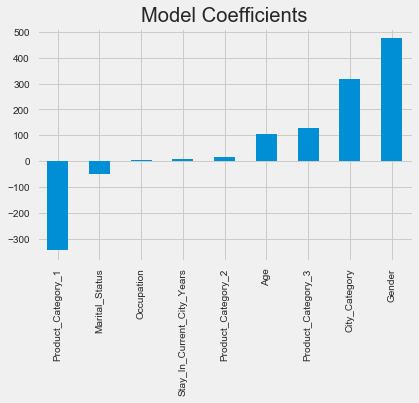

In [36]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train(model,X,y)
coef=pd.Series(model.coef_,X.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

## Feature Importance

Results
RMSE 3366.374724520864
CV Score 3339.180728127055


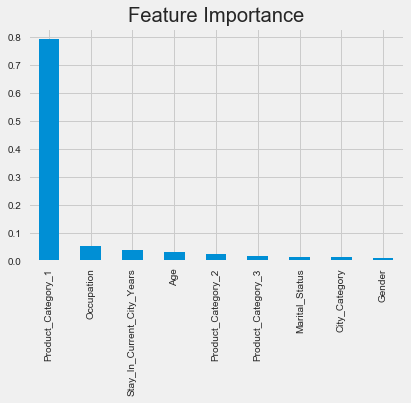

In [40]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
train(model,X,y)
features=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importance')

## Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_jobs=-1)
train(model,X,y)
features=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importance')

Results
RMSE 3062.6621833951485
CV Score 3052.0600273398736


## Extra tree

In [44]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor(n_jobs=-1)
train(model,X,y)
features=pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)
features.plot(kind='bar',title='Feature Importance')

Results
RMSE 3194.8836976179136
CV Score 3180.6810091496764


## For test dataset

In [46]:
test=pd.read_csv('test.csv')

#### Do all the pre-processing as we have done above for the train dataset

In the test dataset doesnot have the 'Purchase ' column 

In [47]:
test['Product_Category_2']=test['Product_Category_2'].fillna(-2.0).astype("float32")
test['Product_Category_3']=test['Product_Category_3'].fillna(-2.0).astype("float32")

In [48]:
#by dict encode the values

gender_dict={'F':0, 'M':1}
test['Gender']=test['Gender'].apply(lambda x: gender_dict[x])

In [50]:
# label encoding columns
# to improve the metric use one hot encoding

cols=['Age','City_Category','Stay_In_Current_City_Years']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in cols:
    test[col]=le.fit_transform(test[col])
test.head()

User_ID Product_ID  Gender  Age  Occupation  City_Category  \
0  1000004  P00128942       1    4           7              1   
1  1000009  P00113442       1    2          17              2   
2  1000010  P00288442       0    3           1              1   
3  1000010  P00145342       0    3           1              1   
4  1000011  P00053842       0    2           1              2   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               1                   1   
1                           0               0                   3   
2                           4               1                   5   
3                           4               1                   4   
4                           1               0                   4   

   Product_Category_2  Product_Category_3  
0                11.0                -2.0  
1                 5.0                -2.0  
2                14.0                -2.0  
3                 9.0                -2.0  
4                 5.0                12.0

In [53]:
X_test=test.drop(columns=['User_ID','Product_ID'])

In [54]:
pred=model.predict(X_test)


In [55]:
pred

array([15047.215     , 10600.        ,  8329.625     , ...,
       13829.265     , 23714.        ,  2170.91933333])

In [64]:
submission=pd.DataFrame()
submission['User_ID']=test['User_ID']
submission['Product_ID']=test['Product_ID']

submission['Purchase']=pred

In [65]:
submission

User_ID Product_ID      Purchase
0       1000004  P00128942  15047.215000
1       1000009  P00113442  10600.000000
2       1000010  P00288442   8329.625000
3       1000010  P00145342   2263.885000
4       1000011  P00053842   2671.047333
...         ...        ...           ...
233594  1006036  P00118942   6667.106667
233595  1006036  P00254642   5935.842105
233596  1006036  P00031842  13829.265000
233597  1006037  P00124742  23714.000000
233598  1006039  P00316642   2170.919333

[233599 rows x 3 columns]

Save the test file as 'submission.csv'

In [67]:
submission.to_csv('submission.csv', index=False)